
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Pandas DataFrame: Two-dimensional labeled data structure

Probably the most important data structure of pandas is the `DataFrame`. It's a tabular structure tightly integrated with `Series`.

A **Pandas DataFrame** is the primary data structure in the Pandas library, representing a **two-dimensional labeled table** with columns of potentially different data types (similar to a spreadsheet or SQL table).

Each **row** and **column** has a label (index and column names), which allows for flexible data manipulation, selection, and alignment.

Pandas DataFrame main characteristics include:

* **Two-dimensional** structure (rows and columns)
* Each column is a **Pandas Series**
* Columns can hold **different data types**
* Supports **powerful indexing, slicing, and filtering**
* Built-in support for **missing data**, **grouping**, **merging**, **pivoting**, and **reshaping**
* Integrates well with **NumPy**, **Matplotlib**, and other Python libraries

DataFrames are ideal for working with **structured data** such as CSV files, SQL tables, Excel sheets, and JSON. They offer spreadsheet-like functionality with the power of Python programming.

Unlike NumPy arrays, DataFrames are **label-aware** and much more **flexible** in handling real-world data with mixed types and irregular shapes.



In [147]:
import numpy as np
import pandas as pd

In [148]:
# import warnings
# warnings.filterwarnings(action='ignore')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# DataFrame Creation & Basic Attributes


We'll keep our analysis of G7 but more extended version compared to the one we used at Series Countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table

(as the one you can appreciate [here](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing)):

<img width="700" src="https://user-images.githubusercontent.com/872296/38153492-72c032ca-3443-11e8-80f4-9de9060a5127.png" />


## Adding each column at a time

In [149]:
df = pd.DataFrame()  # empty dataframe
df

""


In [150]:
# lets add first column
df["Population"] = [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523]
df

,Population
0,35.467
1,63.951
2,80.940
3,60.665
4,127.061
5,64.511
6,318.523


In [151]:
# second column
df["GDP"] = [1785387, 2833687, 3874437, 2167744, 4602367, 2950039, 17348075]
df

,Population,GDP
0,35.467,1785387
1,63.951,2833687
2,80.940,3874437
3,60.665,2167744
4,127.061,4602367
5,64.511,2950039
6,318.523,17348075


In [152]:
# third column
df["Surface Area"] = [9984670, 640679, 357114, 301336, 377930, 242495, 9525067]
df

,Population,GDP,Surface Area
0,35.467,1785387,9984670
1,63.951,2833687,640679
2,80.940,3874437,357114
3,60.665,2167744,301336
4,127.061,4602367,377930
5,64.511,2950039,242495
6,318.523,17348075,9525067


In [153]:
# 4th
df["HDI"] = [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915]
df

,Population,GDP,Surface Area,HDI
0,35.467,1785387,9984670,0.913
1,63.951,2833687,640679,0.888
2,80.940,3874437,357114,0.916
3,60.665,2167744,301336,0.873
4,127.061,4602367,377930,0.891
5,64.511,2950039,242495,0.907
6,318.523,17348075,9525067,0.915


In [154]:
# 5th
df["Continent"] = [
    "America",
    "Europe",
    "Europe",
    "Europe",
    "Asia",
    "Europe",
    "America",
]
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


## Column and index

Note that the dataframe we just made has columns and indexes. And we just add columns as attribute while creation. _(The `columns` attribute is optional. I'm using it to keep the same order as in the picture above)_

`DataFrame`s also have indexes. As you can see in the "table" above, pandas has assigned a numeric, auto-incremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:


### Index

In [155]:
# initially, by default, we have range index
idx = df.index
print(type(idx))
print(idx)

<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=7, step=1)


In [156]:
# lets set string index

df.index = [
    "Canada",
    "France",
    "Germany",
    "Italy",
    "Japan",
    "United Kingdom",
    "United States",
]
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [157]:
idx = df.index
print(type(idx))
print(idx)

<class 'pandas.core.indexes.base.Index'>
Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')


### Columns
Notice the type of columns is also `index`

In [158]:
# remember we assign columns as attribute "columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])"
col = df.columns
print(type(col))
print(col)

<class 'pandas.core.indexes.base.Index'>
Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')


## Shape, Size, Dtype

In [159]:
df.size

35

In [160]:
df.shape

(7, 5)

In [161]:
print("Row count", df.shape[0])
print("Column count", df.shape[1])

Row count 7
Column count 5


In [162]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

## Using dictionary and list (one code call)

### Note: Do not worry about how to create dataframe using dictionary.

Consider the code to create df is just given

Creating `DataFrame`s manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [163]:
df = pd.DataFrame(
    {
        "Population": [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
        "GDP": [1785387, 2833687, 3874437, 2167744, 4602367, 2950039, 17348075],
        "Surface Area": [9984670, 640679, 357114, 301336, 377930, 242495, 9525067],
        "HDI": [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915],
        "Continent": [
            "America",
            "Europe",
            "Europe",
            "Europe",
            "Asia",
            "Europe",
            "America",
        ],
    },
    columns=["Population", "GDP", "Surface Area", "HDI", "Continent"],
    index=[
        "Canada",
        "France",
        "Germany",
        "Italy",
        "Japan",
        "United Kingdom",
        "United States",
    ],
)

df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [164]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# DataFrame export and import
- `to_csv` and `read_csv`

In [165]:
df.to_csv("my-csv-file1.csv")

In [166]:
df.to_csv("my-csv-file2.csv", sep="\t")

In [167]:
temp = pd.read_csv("my-csv-file1.csv")
temp

,Unnamed: 0,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387,9984670,0.913,America
1,France,63.951,2833687,640679,0.888,Europe
2,Germany,80.940,3874437,357114,0.916,Europe
3,Italy,60.665,2167744,301336,0.873,Europe
4,Japan,127.061,4602367,377930,0.891,Asia
5,United Kingdom,64.511,2950039,242495,0.907,Europe
6,United States,318.523,17348075,9525067,0.915,America


In [168]:
temp = pd.read_csv("my-csv-file1.csv", index_col=0)
temp

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 🔍 Methods for `Data Exploration`
- just same as what we did for series


## First Step When Exploring a DataFrame
When you first receive a dataset, it's important to quickly understand its structure and contents. Two essential methods in pandas for this are: `.describe()` and `.info()`. These two methods help you quickly assess data quality and decide what cleaning or transformations might be needed. 

### ✅ `df.describe()`
- Provides summary statistics for numerical columns.
- Includes:
  - Count, mean, std (standard deviation)
  - Min, max, and quartiles (25%, 50%, 75%)

> Useful for understanding the range, distribution, and potential outliers in your data.

In [169]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


### ✅ `df.info()`
- Gives a concise summary of the DataFrame.
- Shows:
  - Number of rows and columns
  - Column names and data types
  - Non-null counts (helps identify missing data)
  - Memory usage

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


## For catagorical data only!
###  ✅ `.unique()`, `.value_counts()`
- Returns a count of unique values in a column, sorted by frequency.

> Helps you see how many times each category appears, and can reveal class imbalance or data entry issues.

In [171]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [172]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
Name: count, dtype: int64

In [173]:
df["Continent"].unique()

array(['America', 'Europe', 'Asia'], dtype=object)

In [174]:
df["Continent"].value_counts()

Continent
Europe     4
America    2
Asia       1
Name: count, dtype: int64

In [175]:
print(type(df["Continent"].unique()))
print(type(df["Continent"].value_counts()))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


### ✅ `.groupby`

In [176]:
df.groupby("Continent")

In [177]:
df.groupby("Continent")["GDP"].mean()

Continent
America    9566731.00
Asia       4602367.00
Europe     2956476.75
Name: GDP, dtype: float64

In [178]:
df.groupby("Continent")["GDP"].mean().to_frame()

,GDP
Continent,
America,9566731.00
Asia,4602367.00
Europe,2956476.75


# 💖 DataFrame Plotting

<Axes: >

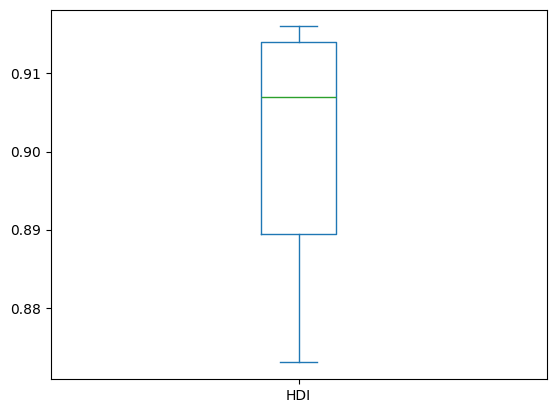

In [179]:
df["HDI"].plot(kind="box")

<Axes: xlabel='Continent'>

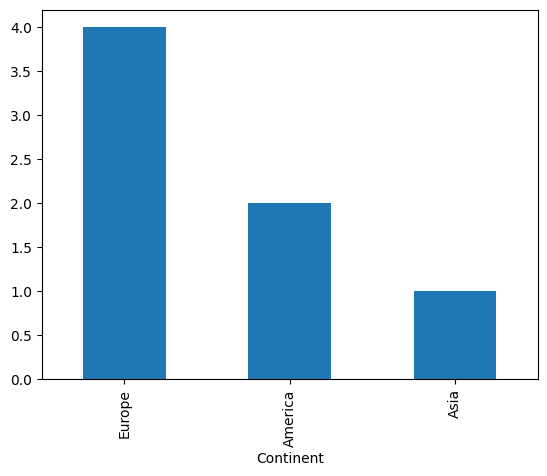

In [180]:
df["Continent"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

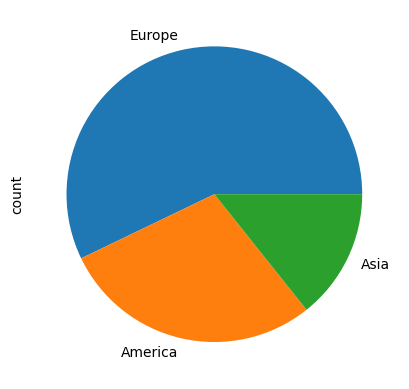

In [181]:
df["Continent"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

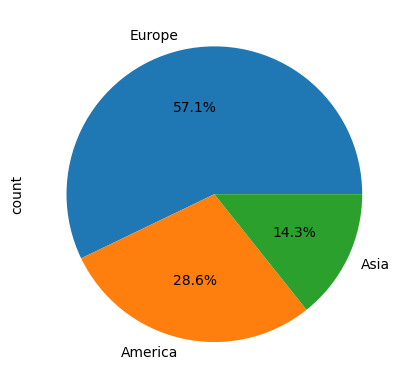

In [182]:
df["Continent"].value_counts().plot(kind="pie", autopct="%1.1f%%")

<Axes: ylabel='GDP'>

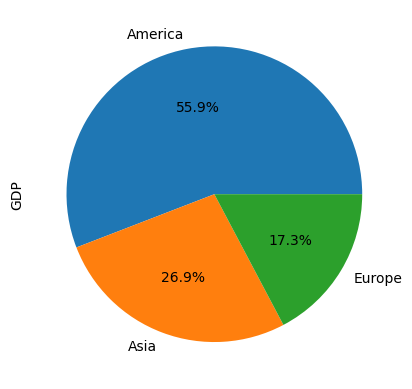

In [183]:
df.groupby("Continent")["GDP"].mean().plot(kind="pie", autopct="%1.1f%%")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Indexing, Selection and Slicing

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a `Series`:


In [184]:
df  # recall

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


---
## loc and iloc and using braket

In [185]:
# Germany GDP = 3874437
df.iloc[2, 1]

np.int64(3874437)

In [186]:
# bottom right corner
df.iloc[-1, -1]

'America'

In [187]:
df.loc["Canada"]  # getting a row

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [188]:
# df["Canada"]  # error Canada is NOT one of columns

In [189]:
df["Population"]  # getting a column

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

In [190]:
# df.loc["Population"]

---
## Series slicing

Note that the `index` of the returned Series is the same as the DataFrame one. And its `name` is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you can use the `to_frame` method:


In [191]:
sr = df.loc["Canada"]
# note that taking single row or column will result Series NOT dataframe
print(type(df))
print(type(sr))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [192]:
sr = df["Population"]
# note that taking single row or column will result Series NOT dataframe
print(type(df))
print(type(sr))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### series to frame

In [193]:
df["Population"].to_frame()  # use to_frame() to convert Series to DataFrame

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [194]:
df[["Population"]]

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


---
## Multiple Indexing

Multiple columns can also be selected similarly to `numpy` and `Series`:


In [195]:
df  # recall

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [196]:
df[["Population", "HDI"]]

,Population,HDI
Canada,35.467,0.913
France,63.951,0.888
Germany,80.940,0.916
Italy,60.665,0.873
Japan,127.061,0.891
United Kingdom,64.511,0.907
United States,318.523,0.915


In this case, the result is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:


In [197]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [198]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


Row level selection works better with `loc` and `iloc` **which are recommended** over regular "direct slicing" (`df[:]`).

`loc` selects rows matching the given index:


In [199]:
# common error -> this is like getting row of France and column of Italy
# df.loc["France", "Italy"]

In [200]:
df.loc[["France", "Italy"]]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Italy,60.665,2167744,301336,0.873,Europe


In [201]:
df.loc["France":"Italy"]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:


In [202]:
df.loc["France":"Italy", "Population"]

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [203]:
df.loc["France":"Italy", ["Population", "GDP"]]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


`iloc` works with the (numeric) "position" of the index:


In [204]:
df  # recall

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [205]:
df.iloc[0]  # df.iloc[0, :]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [206]:
df.iloc[-1]  # df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [207]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [208]:
df.iloc[1:3, :-2]

,Population,GDP,Surface Area
France,63.951,2833687,640679
Germany,80.940,3874437,357114


In [209]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [210]:
df.iloc[1:3, [0, 3]]

,Population,HDI
France,63.951,0.888
Germany,80.940,0.916


In [211]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
France,2833687,640679
Germany,3874437,357114


> **RECOMMENDED: Always use `loc` and `iloc` to reduce ambiguity, specially with `DataFrame`s with numeric indexes.**


---
## Conditional selection (boolean arrays)

We saw conditional selection applied to `Series` and it'll work in the same way for `DataFrame`s. After all, a `DataFrame` is a collection of `Series`:


In [212]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [213]:
df["Population"] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [214]:
df.loc[df["Population"] > 70]  # standard

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [215]:
df[df["Population"] > 70]  # same result

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [216]:
# df[df["Population"] > 70, ["Population", "GDP"]] # error. you need to use loc!!
df.loc[df["Population"] > 70, ["Population", "GDP"]]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Modifying DataFrame - Basic

> note: for more difficult handlings, please find differant notebook
> 
> note: I am going to create `df0` for backup because I do not want to modify the original version

In [217]:
df0 = df.copy()  # DO NOT DELETE

---
## Dropping stuff
- We are going to learn about data cleaning more detail in future. Here is just short introduction

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to _select_ you could point which ones you'd like to `drop`:


In [218]:
df = df0.copy()
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [219]:
df.drop("Japan")

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [220]:
df  # reprinting, and it still has Japan. You must know why

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [221]:
df = df.drop("Japan")  # Now you won't see Japan
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


### Avoiding key error when drop

In [222]:
# df.drop("Japan") # key error because you are dropping you already dropped

In [223]:
df.drop("Japan", errors="ignore")  # lets ignore errors

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


### Dropping many rows

In [224]:
df.drop(["Canada", "United States"])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe


In [225]:
df.drop(df[df["Continent"] == "America"].index)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe


In [226]:
df.drop(["Canada", "Japan", "South Korea", "North Korea"], errors="ignore")

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


### Dropping with axis specified

In [227]:
df.drop(columns=["Population", "HDI"])  # if you want to drop columns

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [228]:
df.drop(["Italy", "France"], axis=0)  # axis=0 is actually no need

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Germany,80.940,3874437,357114,0.916,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [229]:
df.drop(["Population", "HDI"], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [230]:
df.drop(["Population", "HDI"], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [231]:
df.drop(["Population", "HDI"], axis="columns")

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [232]:
df.drop(["France", "Germany"], axis="rows")

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


---
## `inplace=True` Attribute
All these `drop` methods return a new `DataFrame`. If you'd like to modify it "in place", you can use the `inplace` attribute


In [233]:
df = df0.copy()
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [234]:
df.drop(["France", "Germany"], inplace=True)
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


---
## Vectorized Operations


In [235]:
df = df0.copy()
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [236]:
df[["Surface Area", "Population", "GDP"]] / 100

,Surface Area,Population,GDP
Canada,99846.70,0.35467,17853.87
France,6406.79,0.63951,28336.87
Germany,3571.14,0.80940,38744.37
Italy,3013.36,0.60665,21677.44
Japan,3779.30,1.27061,46023.67
United Kingdom,2424.95,0.64511,29500.39
United States,95250.67,3.18523,173480.75


In [237]:
# df[["Surface Area", "Population", "Continent"]] / 100 # error. why?!

In [238]:
df[["Surface Area", "Population", "GDP"]].mean()

Surface Area    3.061327e+06
Population      1.073026e+02
GDP             5.080248e+06
dtype: float64

---
## Sort

In [239]:
df = df0.copy()
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [240]:
df.sort_index(ascending=False)

,Population,GDP,Surface Area,HDI,Continent
United States,318.523,17348075,9525067,0.915,America
United Kingdom,64.511,2950039,242495,0.907,Europe
Japan,127.061,4602367,377930,0.891,Asia
Italy,60.665,2167744,301336,0.873,Europe
Germany,80.940,3874437,357114,0.916,Europe
France,63.951,2833687,640679,0.888,Europe
Canada,35.467,1785387,9984670,0.913,America


In [241]:
df  # wasn't overwritten

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [242]:
df.sort_index(ascending=False, inplace=True)
df

,Population,GDP,Surface Area,HDI,Continent
United States,318.523,17348075,9525067,0.915,America
United Kingdom,64.511,2950039,242495,0.907,Europe
Japan,127.061,4602367,377930,0.891,Asia
Italy,60.665,2167744,301336,0.873,Europe
Germany,80.940,3874437,357114,0.916,Europe
France,63.951,2833687,640679,0.888,Europe
Canada,35.467,1785387,9984670,0.913,America


In [243]:
df.sort_values("HDI")

,Population,GDP,Surface Area,HDI,Continent
Italy,60.665,2167744,301336,0.873,Europe
France,63.951,2833687,640679,0.888,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
Canada,35.467,1785387,9984670,0.913,America
United States,318.523,17348075,9525067,0.915,America
Germany,80.940,3874437,357114,0.916,Europe


In [244]:
df.sort_values("Population")

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Italy,60.665,2167744,301336,0.873,Europe
France,63.951,2833687,640679,0.888,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [245]:
df.sort_values("Continent")

,Population,GDP,Surface Area,HDI,Continent
United States,318.523,17348075,9525067,0.915,America
Canada,35.467,1785387,9984670,0.913,America
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
Italy,60.665,2167744,301336,0.873,Europe
Germany,80.940,3874437,357114,0.916,Europe
France,63.951,2833687,640679,0.888,Europe


In [246]:
df.sort_values(["Continent", "GDP"])  # more than one

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
United States,318.523,17348075,9525067,0.915,America
Japan,127.061,4602367,377930,0.891,Asia
Italy,60.665,2167744,301336,0.873,Europe
France,63.951,2833687,640679,0.888,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
Germany,80.940,3874437,357114,0.916,Europe


---
## Resetting index

In [247]:
df = df0.copy()  # roll back
df.reset_index(inplace=True)
df

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387,9984670,0.913,America
1,France,63.951,2833687,640679,0.888,Europe
2,Germany,80.940,3874437,357114,0.916,Europe
3,Italy,60.665,2167744,301336,0.873,Europe
4,Japan,127.061,4602367,377930,0.891,Asia
5,United Kingdom,64.511,2950039,242495,0.907,Europe
6,United States,318.523,17348075,9525067,0.915,America


In [248]:
df.reset_index(inplace=True)  # when you do this again
df

,level_0,index,Population,GDP,Surface Area,HDI,Continent
0,0,Canada,35.467,1785387,9984670,0.913,America
1,1,France,63.951,2833687,640679,0.888,Europe
2,2,Germany,80.940,3874437,357114,0.916,Europe
3,3,Italy,60.665,2167744,301336,0.873,Europe
4,4,Japan,127.061,4602367,377930,0.891,Asia
5,5,United Kingdom,64.511,2950039,242495,0.907,Europe
6,6,United States,318.523,17348075,9525067,0.915,America


In [249]:
# df.reset_index(inplace=True)  # when you do this again two more. error!

# `ValueError: cannot insert level_0, already exists``

In [250]:
df.set_index("HDI")

,level_0,index,Population,GDP,Surface Area,Continent
HDI,,,,,,
0.913,0,Canada,35.467,1785387,9984670,America
0.888,1,France,63.951,2833687,640679,Europe
0.916,2,Germany,80.940,3874437,357114,Europe
0.873,3,Italy,60.665,2167744,301336,Europe
0.891,4,Japan,127.061,4602367,377930,Asia
0.907,5,United Kingdom,64.511,2950039,242495,Europe
0.915,6,United States,318.523,17348075,9525067,America


In [251]:
df.set_index("GDP")

,level_0,index,Population,Surface Area,HDI,Continent
GDP,,,,,,
1785387,0,Canada,35.467,9984670,0.913,America
2833687,1,France,63.951,640679,0.888,Europe
3874437,2,Germany,80.940,357114,0.916,Europe
2167744,3,Italy,60.665,301336,0.873,Europe
4602367,4,Japan,127.061,377930,0.891,Asia
2950039,5,United Kingdom,64.511,242495,0.907,Europe
17348075,6,United States,318.523,9525067,0.915,America


---
## Adding columns by bracket `[...]`
- recall we already did this from the beginning when creating a dataframe

In [254]:
df = df0.copy()  # roll back
df["Lang"] = "whatevs"
df

,Population,GDP,Surface Area,HDI,Continent,Lang
Canada,35.467,1785387,9984670,0.913,America,whatevs
France,63.951,2833687,640679,0.888,Europe,whatevs
Germany,80.940,3874437,357114,0.916,Europe,whatevs
Italy,60.665,2167744,301336,0.873,Europe,whatevs
Japan,127.061,4602367,377930,0.891,Asia,whatevs
United Kingdom,64.511,2950039,242495,0.907,Europe,whatevs
United States,318.523,17348075,9525067,0.915,America,whatevs


In [256]:
df.iloc[[0, 5, 6], -1] = "English"
df

,Population,GDP,Surface Area,HDI,Continent,Lang
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,whatevs
Germany,80.940,3874437,357114,0.916,Europe,whatevs
Italy,60.665,2167744,301336,0.873,Europe,whatevs
Japan,127.061,4602367,377930,0.891,Asia,whatevs
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English
